<a href="https://colab.research.google.com/github/Leebro91/Python/blob/master/Chipotle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# 토이 데이터 chipotle.tsv

import pandas as pd

# Dataframe 형태로 불러오자

file_path = "chipotle.tsv"
chipo = pd.read_csv(file_path, sep = "\t")


In [8]:
print(chipo.shape)    # shpae() 데이터의 행과 열의 크기
print("--------------------------")
print(chipo.info())   # info() 행의 구성정보 열의 구성정보


# object는 데이터 프레임에서 일반적으로 문자열을 의미한다.
# null은 비어있음을 의미한다. 즉 결측값
# 4622 - 3376 = 1246개의 결측지가 존재

(4622, 5)
--------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB
None


In [10]:
chipo.head(10)    # chipo라는 dataframe에서 순서대로 10개의 row데이터를 보여준다.
# order_id : 주문번호
# quantity : 주문수량
# item_name : 주문한 아이템의 이름
# choice_description : 주문한 아이템의 상세 선택 옵션
# item_pirce : 가격정보

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [12]:
# 열, 피처의 형태 종류
# 수치형 피처 (Numerical Feature)
#           1) 연속형 피처 : 어떤 구간안의 모든 값을 데이터로 가질수 있다. 예) 키, 몸무게 등등
#           2) 비연속형 피처 : 셀수 있으며, 일정 구간 안에서 정해진 몇 개의 값만 가진다. 예) 나이
# 범주형 피처 (Categorical Feature)
#           1) 순서가 있는 범주형 피처 : 순서가 있으나 수치는 아니다. 예) 학점 A B C 
#           2) 순서가 없는 범주형 피처 : 데이터가 구분되면서도 순서는 없다. 예) 혈액형

# describe() 함수 : 요약 통계량

chipo['order_id'] = chipo['order_id'].astype(str)  
# order_id는 숫자의 의미를 가지지 않기 떄문에 str로 변환.
print(chipo.describe())
# chipo 데이터 프레임에서 수치형 피처들의 기초 통계량을 확인한다.
# mean 아이템의 평균 주문 수량 약 1.07 -> 대부분이 한 아이템에 대해 1개 정도만 주문했다.
# -> 한사람이 같은 메뉴를 여러개 구매하는 경우는 많지 않다. -> 혼자와서 구매하는 경우가 많다.


          quantity
count  4622.000000
mean      1.075725
std       0.410186
min       1.000000
25%       1.000000
50%       1.000000
75%       1.000000
max      15.000000


In [15]:
# unique() 함수로 범주형 피처의 개수 출력

# 두가지 피처는 범주형 이기 때문에 unique()함수를 사용

print(len(chipo['order_id'].unique()))  # order_id 개수를 출력
print(len(chipo['item_name'].unique()))  # item_name 개수를 출력


1834
50


In [16]:
# ==============================================================================================
# <Step 2 인사이트의 발견>

In [21]:
# 가장 많이 주문한 제품은 무엇일까


# DataFrame['column'] 형태에 value_counts()를 적용해서 분석

item_count = chipo['item_name'].value_counts()[:10]
for idx, (val,cnt) in enumerate(item_count.iteritems(),1):
  print("Top",idx,":",val,cnt)


# 제품당 주문한 양은 얼마인가


chipo['item_name'].value_counts().index.tolist()[0]


Top 1 : Chicken Bowl 726
Top 2 : Chicken Burrito 553
Top 3 : Chips and Guacamole 479
Top 4 : Steak Burrito 368
Top 5 : Canned Soft Drink 301
Top 6 : Steak Bowl 211
Top 7 : Chips 211
Top 8 : Bottled Water 162
Top 9 : Chicken Soft Tacos 115
Top 10 : Chicken Salad Bowl 110


'Chicken Bowl'

In [28]:
# 아이템별 주문 개수와 총량

# 아이템당 주문 개수 
# grouby() 함수를 이용 (데이터프레임에서 특정 피처를 기준으로 그룹을 생성하고 그룹별로 연산이 가능하다.)

order_count = chipo.groupby('item_name')['order_id'].count()
order_count[:10]


item_name
6 Pack Soft Drink         54
Barbacoa Bowl             66
Barbacoa Burrito          91
Barbacoa Crispy Tacos     11
Barbacoa Salad Bowl       10
Barbacoa Soft Tacos       25
Bottled Water            162
Bowl                       2
Burrito                    6
Canned Soda              104
Name: order_id, dtype: int64

In [29]:
# 아이템당 주문 총량
item_quantity = chipo.groupby('item_name')['quantity'].sum()
item_quantity[:10]


item_name
6 Pack Soft Drink         55
Barbacoa Bowl             66
Barbacoa Burrito          91
Barbacoa Crispy Tacos     12
Barbacoa Salad Bowl       10
Barbacoa Soft Tacos       25
Bottled Water            211
Bowl                       4
Burrito                    6
Canned Soda              126
Name: quantity, dtype: int64

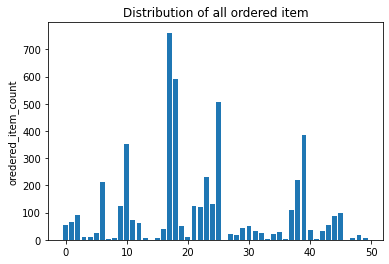

In [35]:
# 간단한 시각화
# 시각화를 하면 숫자와 문자로만 되어있는 데이터에서는 보이지 않던 정보를 발견할수도 있다.

%matplotlib inline   
# 브라우저에서 결과 그림을 바로 볼수 있게 설정

import numpy as np
import matplotlib.pyplot as plt

item_name_list = item_quantity.index.tolist()
x_pos = np.arange(len(item_name_list))
# 50개 아이템의 이름을 모두 x축에 표현하기는 공간이 협소
order_cnt = item_quantity.values.tolist()

plt.bar(x_pos, order_cnt, align = 'center')
plt.ylabel('oredered_item_count')
plt.title('Distribution of all ordered item')

plt.show()

In [36]:
# ============================================================================================
# <Step 3 데이터 전처리>

In [38]:
# apply lamda 함수를 이용한 데이터 전처리
# item_price 가 문자열 이기 때문에 ($) 요약 통계를 구할수 없다.

print(chipo.info())
print('-------------------------------------------------')
chipo['item_price'].head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   object
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(1), object(4)
memory usage: 180.7+ KB
None
-------------------------------------------------


0     $2.39 
1     $3.39 
2     $3.39 
3     $2.39 
4    $16.98 
Name: item_price, dtype: object

In [44]:
# $ 기호 제거

chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x[1:]))

chipo.describe()

# appy()함수는 시리즈 단위의 연산을 처리하는 기능을 수행 
# Sum() mean() 등 과 같이 연산이 정의된 함수를 받는다.


TypeError: ignored

In [46]:
chipo['item_price'].head()

0     2.39
1     3.39
2     3.39
3     2.39
4    16.98
Name: item_price, dtype: float64

In [48]:
# ============================================================================================
# <Step 4 탐색적 분석>

# 마치 데이터와 스무고개 놀이 와 비슷하다. 조금씩 복잡한 질문들로 데이터 분석
# - 주문당 평균 금액 출력
# - 한 주문에 10달러 이상 사용한 주문들의 id들 출력
# - 각 아이템의 가격은
# - 가장 비싼 주문에서 item이 몇개 팔렸는지


In [51]:
# 주문당 평균 금액

chipo.groupby('order_id')['item_price'].sum().mean()

18.811428571428717

In [53]:
chipo.groupby('order_id')['item_price'].sum().describe()[:10]

count    1834.000000
mean       18.811429
std        11.652512
min        10.080000
25%        12.572500
50%        16.200000
75%        21.960000
max       205.250000
Name: item_price, dtype: float64

In [60]:
# 한 주문에 10달러 이상 사용한 주문 번호(id) 출력

chipo_orderid_group = chipo.groupby('order_id').sum()
results = chipo_orderid_group[chipo_orderid_group.item_price >= 10]

print(results[:10])
print(results.index.values)


          quantity  item_price
order_id                      
1                4       11.56
10               2       13.20
100              2       10.08
1000             2       20.50
1001             2       10.08
1002             2       10.68
1003             2       13.00
1004             2       21.96
1005             3       12.15
1006             8       71.40
['1' '10' '100' ... '997' '998' '999']


In [64]:
# 각 아이템의 가격을 구하기

# - 동일 아이템을 1개 구매한 주문만 선별
# - item_name을 기준으로 group_by연산 수행하고 min()함수로 각 그룹별 최저가를 계산
# - item_price를 기준으로 정렬 -> sort_values()함수(series 데이터를 정렬) 사용

chipo_one_item = chipo[chipo.quantity == 1]
price_per_item = chipo_one_item.groupby('item_name').min()
price_per_item.sort_values(by = "item_price", ascending = False)[:10]

,order_id,quantity,choice_description,item_price
item_name,,,,
Steak Salad Bowl,1032,1,"[Fresh Tomato Salsa, Lettuce]",9.39
Barbacoa Salad Bowl,1283,1,"[Fresh Tomato Salsa, Guacamole]",9.39
Carnitas Salad Bowl,1035,1,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",9.39
Carnitas Soft Tacos,1011,1,"[Fresh Tomato Salsa (Mild), [Black Beans, Rice...",8.99
Carnitas Crispy Tacos,1774,1,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",8.99
Steak Soft Tacos,1054,1,"[Fresh Tomato Salsa (Mild), [Cheese, Sour Cream]]",8.99
Carnitas Salad,1500,1,"[[Fresh Tomato Salsa (Mild), Roasted Chili Cor...",8.99
Carnitas Bowl,1007,1,"[Fresh Tomato (Mild), [Guacamole, Lettuce, Ric...",8.99
Barbacoa Soft Tacos,1103,1,"[Fresh Tomato Salsa, [Black Beans, Cheese, Let...",8.99


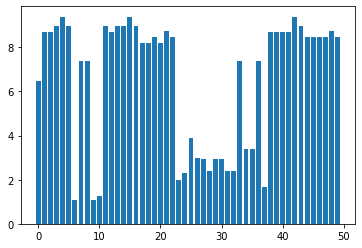

In [68]:
item_name_list = price_per_item.index.tolist()
x_pos = np.arange(len(item_name_list))
item_price = price_per_item['item_price'].tolist()

plt.bar(x_pos, item_price, align = 'center')
plt.show()

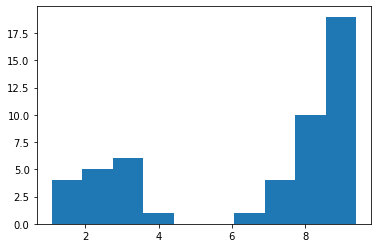

In [71]:
plt.hist(item_price)
plt.show()

In [73]:
# 가장 비싼 주문에서 item 이 총 몇개 팔렸는지??

chipo.groupby('order_id').sum().sort_values(by = 'item_price', ascending = False)[:5]

,quantity,item_price
order_id,,
926,23,205.25
1443,35,160.74
1483,14,139.00
691,11,118.25
1786,20,114.30


In [81]:
# 'Veggie Salad Bowl'이 몇번 주문되었는지

chipo_salad = chipo[chipo['item_name']=="Veggie Salad Bowl"]
print(len(chipo_salad))
chipo_salad.head(5)

18


,order_id,quantity,item_name,choice_description,item_price
186,83,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25
295,128,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",11.25
455,195,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25
496,207,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Rice, Lettuce, Guacamole...",11.25
960,394,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75


In [84]:
# "Chicken Bowl"을 2개 이상 주문한 주문 횟수

chipo_chicken = chipo[chipo['item_name']=="Chicken Bowl"]
# "chicken bowl 메뉴의 총 주문 수량"
chipo_chicken_ordersum = chipo_chicken.groupby('order_id').sum()['quantity']
chipo_chicken_result = chipo_chicken_ordersum[chipo_chicken_ordersum >= 2]
# 2개 이상 주문한 고객들

print(chipo_chicken_result)

order_id
1004    2
1023    2
1072    2
1078    2
1091    2
       ..
972     2
973     3
983     2
986     2
997     2
Name: quantity, Length: 114, dtype: int64
